In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neo.io import AxonIO

In [3]:
file = r"C:\Users\dongq\OneDrive\mouse patch-seq\3 weeks\23302041.abf"

In [4]:
f = AxonIO(file)
blocks = f.read()
bl = blocks[0]

In [5]:
num_episodes = f.segment_count(0)
sampling_rate = f.get_signal_sampling_rate(0)
block_count = f.block_count()
segs = bl.segments

In [15]:
from feature_extractor import SpikeFeatureExtractor, SpikeTrainFeatureExtractor
sfe = SpikeFeatureExtractor(filter=2)
spte = SpikeTrainFeatureExtractor(start=0, end=16000)


{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'avg_rate': 0}
{'adapt': nan, 'latency': 0.9986499324966248, 'isi_cv': nan, 'mean_isi': nan, 'median_isi': nan, 'first_isi': nan, 'avg_rate': 6.25e-05}
{'adapt': 0.12440377431990758, 'latency': 0.3049152457622881, 'isi_cv': 0.2692995530796465, 'mean_isi': 0.26691334566728336, 'median_isi': 0.22091104555227759, 'first_isi': 0.22091104555227759, 'avg_rate': 0.00025}
{'adapt': 0.08611784297495981, 'latency': 0.2754137706885344, 'isi_cv': 0.22494030153031347, 'mean_isi': 0.25115255762788136, 'median_isi': 0.2552127606380319, 'first_isi': 0.1721086054302715, 'avg_rate': 0.000375}
{'adapt': 0.0475238568314829, 'latency': 0.18920946047302364, 'isi_cv': 0.171342825013016, 'mean_isi': 0.183909195459773, 'median_isi': 0.17755887794389721, 'first_isi': 0.15480774038701936, 'avg_rate': 0.0004375}
{'adapt': 0

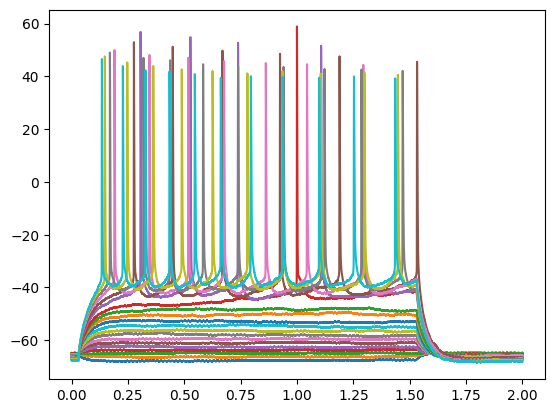

In [16]:
data = []
time_stamp = np.linspace(0, 2, 20000)
index = 0
for seg in segs:
    seg_v = seg.analogsignals[0]
    v_, i_ = seg_v.T
    v = np.asarray(v_)/20
    i = np.asarray(i_)
    ft = sfe.process(t=time_stamp, v=v, i=i)
    ft.to_excel(f'{index}.xlsx', engine='openpyxl', index=False)
    sptft= spte.process(t=time_stamp, v=v, i=i, spikes_df=ft)
    index += 1
    print(sptft)
    plt.plot(time_stamp, v)
    

    


In [28]:
from neo.io import NWBIO
import datetime
bl.annotations['session_start_time'] = datetime.datetime.now()
io = NWBIO(filename='convertedfile.nwb', mode='w')
io.write(bl)

C:\Users\dongq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pynwb\file.py:470: UserWarning: Date is missing timezone information. Updating to local timezone.
  args_to_set['session_start_time'] = _add_missing_timezone(session_start_time)
